## KNN algorithm

Detailed explanation on [wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Example adapted from [scipy-lectures](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html)

In [4]:
!pip install matplotlib --quiet
!pip install scikit-learn --quiet

In [5]:
%matplotlib inline

## Nearest-neighbor prediction on iris

Plot the decision boundary of nearest neighbor decision on iris, first
with a single nearest neighbor, and then using 3 nearest neighbors.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000', '#00FF00'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [7]:
import pandas as pd

iris_df = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['target']
)

iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Put the result into a color plot.

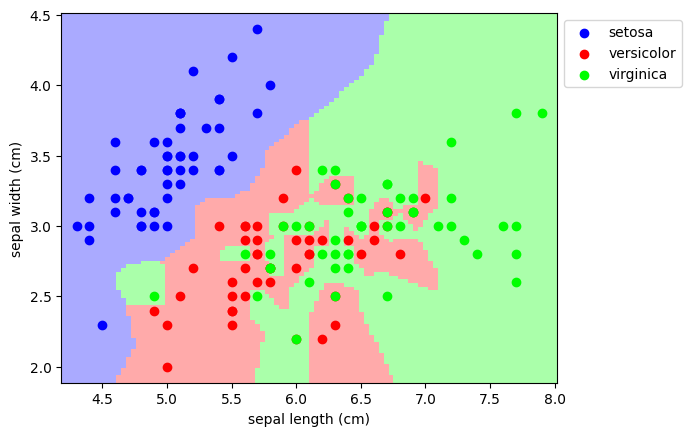

In [8]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(
    xx,
    yy,
    Z,
    cmap = cmap_light,
    shading = 'auto'
)

# Plot also the training points
for i in range(3):
    plt.scatter(
        X[y == i, 0],
        X[y == i, 1],
        c = [cmap_bold.colors[i]],
        label = iris.target_names[i]
    )

plt.legend(
    loc = 'upper left',
    bbox_to_anchor = (1, 1)
)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

And now, redo the analysis with 3 neighbors.

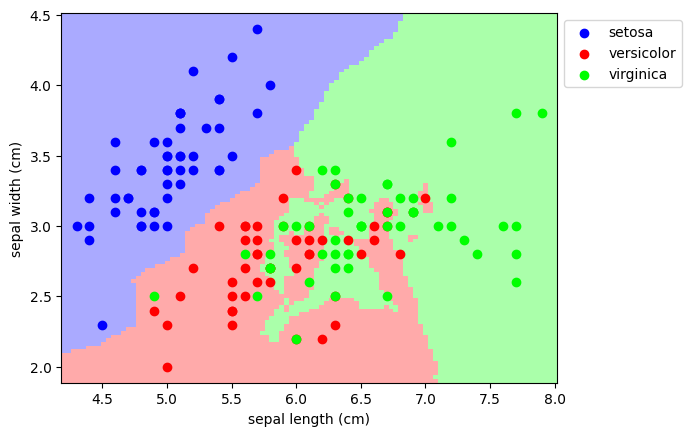

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(
    xx,
    yy,
    Z,
    cmap = cmap_light,
    shading = 'auto'
)

# Plot also the training points
for i in range(3):
    plt.scatter(
        X[y == i, 0],
        X[y == i, 1],
        c = [cmap_bold.colors[i]],
        label = iris.target_names[i]
    )

plt.legend(
    loc = 'upper left',
    bbox_to_anchor = (1, 1)
)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()